

# Assignment 1 | IAI5101(GNG5300) Winter 2022 | Zain Ur-Rehman | 300207267 | zurre072@uottawa.ca

This is Assignment 1 | IAI5101(GNG5300) Winter 2022 report. This google colab notebook contains the code as well as written explanation for all three sections of the assignment: **A(Feature Engineering), B(Model Development), C(Model Evaluation and Comparison)**. References are also provided with code section. 

Also, please refer to **Assignment1_IAI5101_ZainUrRehman_ModelAnalysisAndComparison.pdf** also submitted on Brightspace for side by side comparisions of confusion matrices, ROC curves and classification results for various models explored.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from datetime import date, time, datetime
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# A. Feature Engineering

**A1.** 110527 entries in all columns. No missing values in the data provided

**A2.** Frequency of distinct values in each feature.

Unique # of PatientId: 62299

Unique # of  AppointmentID: 110527

Unique # of  Gender: 2

Unique # of  ScheduledDay: 103549

Unique # of  Age: 104

Unique # of  Neighbourhood: 81

Unique # of  Scholarship: 2

Unique # of  Hipertension: 2

Unique # of  Diabetes: 2

Unique # of  Alcoholism: 2

Unique # of  Handcap: 5

Unique # of  SMS_received: 2

Unique # of  NoShow: 2


**A3.** Outliers visualized for Age and Handcap. For age, used the box plots. For Handcap, replaced Handcap=2,3,4 with Handcap=1.

**A4.** Removed all rows where Age<1. This means removed the rows for 0s and -1 Age from the dataset.

**A5, A7.** WaitingTime = Appointimet - Scheduled. If the waiting times are negative, take the abs. To do this, I made the appointment and scheduled times as datetime64 formats. Other ways explored is to break the dates in month, day, year and then take the difference of the days. Also, since the times in appointment day are 00:00:00, make it 23:59:59 to adjust the appointmentday times. At the end removed the rows with negative difference.

**A6.** Used label encoder to convert non-numeric data into numberic data.

Gender: F=0, M=1

Neighbourhood: Starts from 0. Goes upto 80

NoShow: No=0, Yes=1

**A8.** 'Age', 'Neighbourhood' were transformed using MinMaxScalar transformer. QuantileTransform was also tested but same results were observed.

**A9.** From correlation matrix, observed that SMS received and scheduled to appointment day difference are the most prominent features. Hence, following columns were part of X and Y that were used for model training.

X=(['SMS_received','schd_to_appt_days_diff','Neighbourhood']

Y=(['NoShow']




**Load the excel file from google drive into the variable "df"**

In [3]:
#It takes about 60 seconds to read the excel file from drive
#               ==========

from google.colab import drive
drive.mount('/content/drive')
print ("\nOnce google drive is mounted and correct file path is provided below,")
print ("it takes about 40 seconds to read the excel file from drive")
df = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx") # Takes about 40 seconds to read the file from drive

# Rename No-show to NoShow
df = df.rename(columns={"No-show":"NoShow"})

#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

# Check for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value
print ("\nCheck for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value")
print(df.info())
print(df.isnull().sum())

Mounted at /content/drive

Once google drive is mounted and correct file path is provided below,
it takes about 40 seconds to read the excel file from drive

Check for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  i

**Determine the frequency of distinct values in each feature set**

In [4]:
# Print overall unique possible columns
for column in df.iloc[:,np.r_[2,5,6,7,8,9,10,11,12,13]].columns:
    print("{}:\n{}".format(column,df[column].unique()))

# Number of unique elements.
print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# Numerical features
numerical_features = ["PatientId","AppointmentID","ScheduledDay","AppointmentDay","Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
# Categorical features
categorical_features = ["Gender","Neighbourhood","NoShow"]

# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Printing unique values in each categorical features
for a in categorical_features:
    print("------------------categorical_feature----------------------"+a+": ")
    #print(sorted(df[a].unique()))
    print(df[a].value_counts())

print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Getting number of unique elements in each column.
print("Unique # of PatientId: ")
print (len(df['PatientId'].unique()))
print("Unique # of  AppointmentID: ")
print (len(df['AppointmentID'].unique()))
print("Unique # of  Gender: ")
print (len(df['Gender'].unique()))
print("Unique # of  ScheduledDay: ")
print (len(df['ScheduledDay'].unique()))
print("Unique # of  Age: ")
print (len(df['Age'].unique()))
print("Unique # of  Neighbourhood: ")
print (len(df['Neighbourhood'].unique()))
print("Unique # of  Scholarship: ")
print (len(df['Scholarship'].unique()))
print("Unique # of  Hipertension: ")
print (len(df['Hipertension'].unique()))
print("Unique # of  Diabetes: ")
print (len(df['Diabetes'].unique()))
print("Unique # of  Alcoholism: ")
print (len(df['Alcoholism'].unique()))
print("Unique # of  Handcap: ")
print (len(df['Handcap'].unique()))
print("Unique # of  SMS_received: ")
print (len(df['SMS_received'].unique()))
print("Unique # of  NoShow: ")
print (len(df['NoShow'].unique()))    

Gender:
['F' 'M']
Age:
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÃšBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃƒO PEDRO' 'SANTA MARTHA'
 'SÃƒO CRISTÃ“VÃƒO' 'MARUÃ\x8dPE' 'GRANDE VITÃ“RIA' 'SÃƒO BENEDITO'
 'ILHA DAS CAIEIRAS' 'SANTO ANDRÃ‰' 'SOLON BORGES' 'BONFIM'
 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR' 'ANTÃ”NIO HONÃ“RIO'
 'RESISTÃŠNCIA' 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MONTE BELO'
 'MÃ\x81RIO CYPRESTE' 'SANTO ANTÃ”NIO' 'BELA VISTA' 'PRAIA DO SUÃ\x81'
 'SANTA HELENA' 'ITA

**Count the frequency of negative Age feature observations, and remove them**

In [5]:
print("Before removing the negative and 0 age")
print("--------------------------------------")
print( df['Age'].value_counts() )
# Get names of indexes for which column Age has value less than 0
a = df.index[df['Age'] < 1]
print (a)
df = df.drop(index=a)
print("\nAfter removing the negative and 0 age")
print("-----------------------------------------")
print( df['Age'].value_counts() )
# After removing the negative age row, the count is now 110526 rows. Previously it was 110527 rows

Before removing the negative and 0 age
--------------------------------------
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64
Int64Index([    59,     63,     64,     65,     67,     89,    101,    104,
               132,    150,
            ...
            110335, 110339, 110341, 110342, 110343, 110345, 110346, 110454,
            110460, 110507],
           dtype='int64', length=3540)

After removing the negative and 0 age
-----------------------------------------
1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64


**ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code**

In [6]:
# Using laberl encoder to convert non-numeric data into numberic data
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender) #F=0, M=1
df.Neighbourhood = le.fit_transform(df.Neighbourhood) # Starts from 0. Goes upto 80
df.NoShow = le.fit_transform(df.NoShow) #No=0, Yes=1
# After label encoding
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


**Break the date features into date components. WaitingTime = Appointimet - Scheduled. IF the waiting times are negative, take the abs. To do this, I made the appointment and scheduled times as datetime64 formats. Other ways explored is to break the dates in month, day, year and then take the difference of the days. Also, since the times in appointment day are 00:00:00, make it 23:59:59 to adjust the appointmentday times**

In [7]:
print ("df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type")
print ("----------------------------------------------------------------------------------")
print(df.dtypes)
df['ScheduledDay'] = df['ScheduledDay'].astype('string')
df['AppointmentDay'] = df['AppointmentDay'].astype('string')
print ("\ndf.dtypes prior to changing the ScheduledDay and AppointmentDay to string type")
print ("----------------------------------------------------------------------------------")
print(df.dtypes)

# Code to remove the T and Z characters after changing the ScheduledDay and AppointmentDay to string type
for index, row in df.iterrows():
  temp = df['AppointmentDay'][index]
  temp = df['AppointmentDay'][index].replace('T',' ').replace('Z','')
  df['AppointmentDay'][index] = temp
  temp2 = df['ScheduledDay'][index]
  temp2 = df['ScheduledDay'][index].replace('T',' ').replace('Z','')
  df['ScheduledDay'][index] = temp2

print ("\nT and Z characters removed from ScheduledDay and AppointmentDay")
print ("-----------------------------------------------------------------")

# change ScheduledDay and AppointmentDay to datetime64 format
print ("\nNow, change ScheduledDay and AppointmentDay to datetime64 format")
print ("-----------------------------------------------------------------")
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

print(df.dtypes)

# To get the difference of scheduled and appointment days is to just take the difference and take abs.
print ("\nAdd a new column of WaitingTime. It will be the difference (in days) of ScheduledDay and AppointmentDay")
print ("---------------------------------------------------------------------------------------------------------")
df['WaitingTime'] = (abs(df['AppointmentDay'] - df['ScheduledDay']))/np.timedelta64(1,'D')

# Check for the appointments that were scheduled after the appointment datetimes.
# Around 38567 appointments that were scheduled after the appointment datetimes
(df['ScheduledDay']>df['AppointmentDay']).sum()

# appointment times were set at the earliest time (00:00:00) whereas the times are included in ScheduledDay
# shift all the appointment times to  23:59:59.
# Reference https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
df['AppointmentDay'] = df['AppointmentDay'] +pd.Timedelta('1d') - pd.Timedelta('1s')

# Now after the adjustment, Check for the appointments that were scheduled after the appointment datetimes.
# Around 5 appointments that were scheduled after the appointment datetimes. Remove them from the data.
(df['ScheduledDay']>df['AppointmentDay']).sum()

df = df.loc[(df['ScheduledDay'] <= df['AppointmentDay'])].copy()

# Individual columns for day, month, week and year for schedule and appointment day columns.
df['ScheduledDay_yr'] = df['ScheduledDay'].dt.year.astype(int)
df['AppointmentDay_yr'] = df['AppointmentDay'].dt.year.astype(int)
df['ScheduledDay_mnth'] = df['ScheduledDay'].dt.month.astype(int)
df['AppointmentDay_mnth'] = df['AppointmentDay'].dt.month.astype(int)
df['ScheduledDay_week'] = df['ScheduledDay'].dt.isocalendar().week.astype(int)
df['AppointmentDay_week'] = df['AppointmentDay'].dt.isocalendar().week.astype(int)
df['ScheduledDay_day'] = df['ScheduledDay'].dt.day.astype(int)
df['AppointmentDay_day'] = df['AppointmentDay'].dt.day.astype(int)
df['ScheduledDay_hr'] = df['ScheduledDay'].dt.hour.astype(int)
df['AppointmentDay_hr'] = df['AppointmentDay'].dt.hour.astype(int)
df['ScheduledDay_min'] = df['ScheduledDay'].dt.minute.astype(int)
df['AppointmentDay_min'] = df['AppointmentDay'].dt.minute.astype(int)
df['ScheduledDay_weekday'] = df['ScheduledDay'].dt.dayofweek.astype(int)
df['AppointmentDay_weekday'] = df['AppointmentDay'].dt.dayofweek.astype(int)

# Create schedule to appointment number of days 'schd_to_appt_days_diff' column
df['schd_to_appt_days_diff'] = (df.AppointmentDay - df.ScheduledDay).dt.days

# Check if there is any error...negative difference between scheduled and appointment days
# Find the number of rows where this error occured
print("Negative difference between scheduled and appointment days: ", df['schd_to_appt_days_diff'].lt(0).sum())
print("---------------------------------------------------------- ")

df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type
----------------------------------------------------------------------------------
PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
NoShow              int64
dtype: object

df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type
----------------------------------------------------------------------------------
PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       string
AppointmentDay     string
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap    

In [8]:
# Check the percentage of NoShow = 1
# sum all the elements of the NoShow column. 0s(NoShow=no) won't contribute to this as 1+0=1
# percentageNoShowYes:  0.20. This means probability of 1/5.
# 1 in 5 patients will miss the scheduled appointments.

percentageNoShowYes=sum(df['NoShow'])/len(df['NoShow'])
print ("percentageNoShowYes: ", percentageNoShowYes)

percentageNoShowYes:  0.20260417640350714


**Plot graphs to get some more relation between various independent variables and dependent variable NoShow**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 <a list of 110 Text major ticklabel objects>)

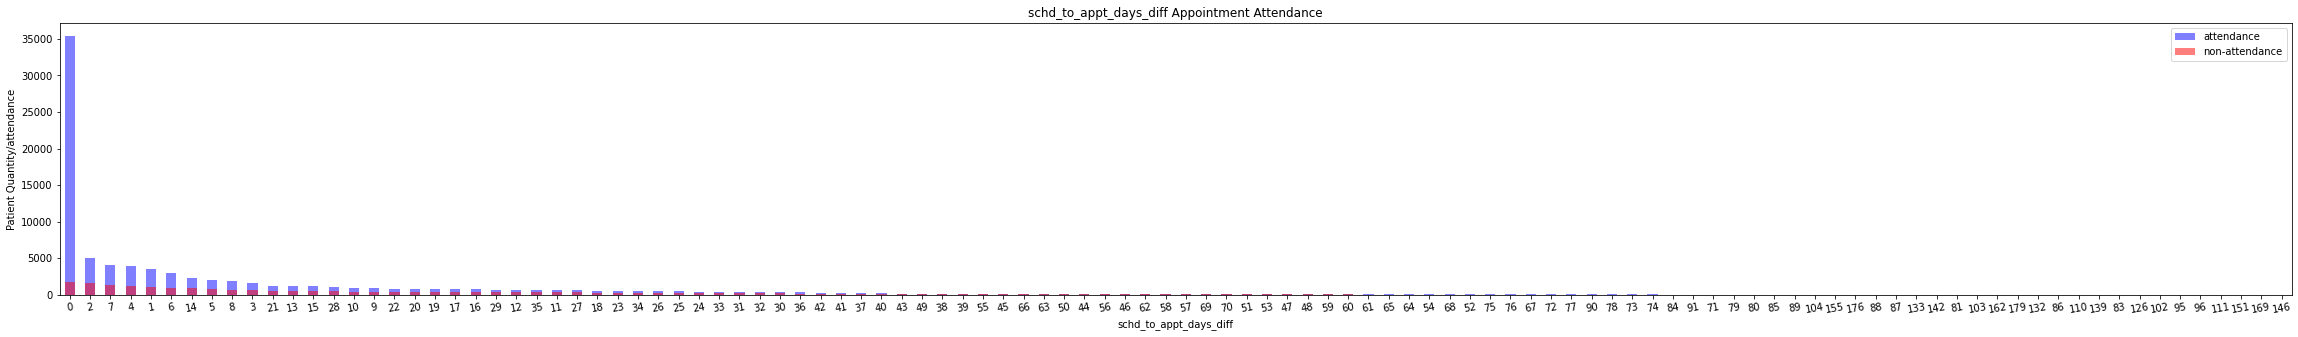

In [9]:
noshow = df.NoShow == 1
show = df.NoShow == 0

# More people showed up on appointments when the delta of appointment and scheduled day is less.
fig = plt.figure(figsize = (40,5))
df.schd_to_appt_days_diff[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df.schd_to_appt_days_diff[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('schd_to_appt_days_diff Appointment Attendance')
plt.xlabel('schd_to_appt_days_diff')
plt.ylabel('Patient Quantity/attendance')
plt.xticks(rotation=10)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

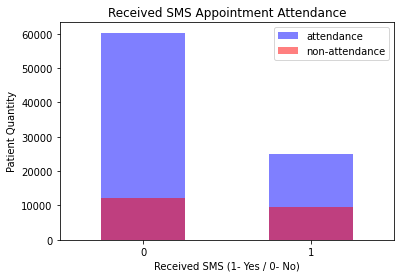

In [10]:
# People who didn't receive SMS show up more on their appointments
df.SMS_received[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df.SMS_received[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Received SMS Appointment Attendance')
plt.xlabel('Received SMS (1- Yes / 0- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

**Check for Outliers Using Box plots**

Text(0.5, 0, 'Age ')

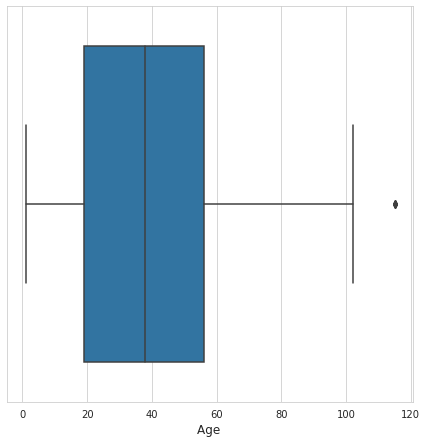

In [11]:
# Check and focus on Age
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x=df['Age'],data=df)
plt.xlabel('Age ', fontsize = 12)

In [12]:
# Check the shape
print ("Shape of the dataframe prior to removig the Age outliers")
print ("--------------------------------------------------------")
print(df.shape)
# Identify the outliers in Age.
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print("Lower_Whisker, Upper_Whisker: ", Lower_Whisker, Upper_Whisker)
df = df[df['Age']< Upper_Whisker]
# Check the shape
print ("Shape of the dataframe After to removig the Age outliers")
print ("---------------------------------------------------------")
print(df.shape)

Shape of the dataframe prior to removig the Age outliers
--------------------------------------------------------
(106982, 30)
Q1:  19.0
Q3:  56.0
IQR:  37.0
Lower_Whisker, Upper_Whisker:  -36.5 111.5
Shape of the dataframe After to removig the Age outliers
---------------------------------------------------------
(106977, 30)


Text(0.5, 0, 'Age with Outliers Removed ')

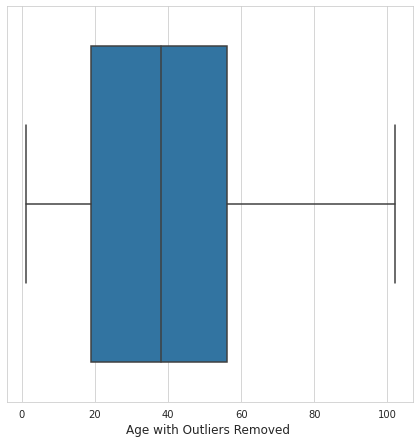

In [13]:
# After removing the Age outliers
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x=df['Age'],data=df)
plt.xlabel('Age with Outliers Removed ', fontsize = 12)

**Earlier, we determined the frequency of distinct values in each feature set. Observed that Handicap has most values in 0s with rest in 1 2 3 and 4. Consider them as outliers. Replace Handcap of 2,3,4 as Handcap 1.**

------------------numerical_feature----------------------Handcap: Before 
0    104743
1      2035
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handicap =1 will have same effect as Handicap = 2, 3 or 4. Change 2,3,4 to 1

------------------numerical_feature----------------------Handcap: After 
0    104743
1      2234
Name: Handcap, dtype: int64

Unique # of elements in Handcap:  [0 1]


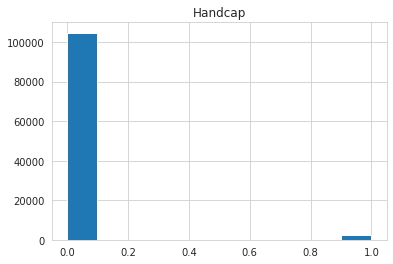

In [14]:
# Numerical features
numerical_features = ["Handcap"]


# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": Before ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Handicap =1 will have same effect as Handicap = 2, 3 or 4. 
# To make the analysis better, we only take two values for the Handicap column
# Handicap = 0 or 1.
print ("\nHandicap =1 will have same effect as Handicap = 2, 3 or 4. Change 2,3,4 to 1\n")
df["Handcap"].replace({2:1, 3:1, 4:1}, inplace=True)

# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": After ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

print("\nUnique # of elements in Handcap: ", df.Handcap.unique())

df.hist(column='Handcap');
# Handcap had skewed distribution
# Replaced 1s, 2s, 3s, and 4s with 1s

**Standardization**

In [15]:
# Normalization 
# The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
#columns_to_standardize = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']
columns_to_standardize = ['Age', 'Neighbourhood']
df[columns_to_standardize] = MinMaxScaler().fit_transform(df[columns_to_standardize])
#df[columns_to_standardize] = QuantileTransformer().fit_transform(df[columns_to_standardize])

**Conduct variability comparison between features using a correlation matrix & drop correlated features**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106977 entries, 0 to 110526
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   PatientId               106977 non-null  float64
 1   Gender                  106977 non-null  int64  
 2   Age                     106977 non-null  float64
 3   Neighbourhood           106977 non-null  float64
 4   Scholarship             106977 non-null  int64  
 5   Hipertension            106977 non-null  int64  
 6   Diabetes                106977 non-null  int64  
 7   Alcoholism              106977 non-null  int64  
 8   Handcap                 106977 non-null  int64  
 9   SMS_received            106977 non-null  int64  
 10  WaitingTime             106977 non-null  float64
 11  schd_to_appt_days_diff  106977 non-null  int64  
 12  ScheduledDay_yr         106977 non-null  int64  
 13  ScheduledDay_mnth       106977 non-null  int64  
 14  AppointmentDay_mnth 

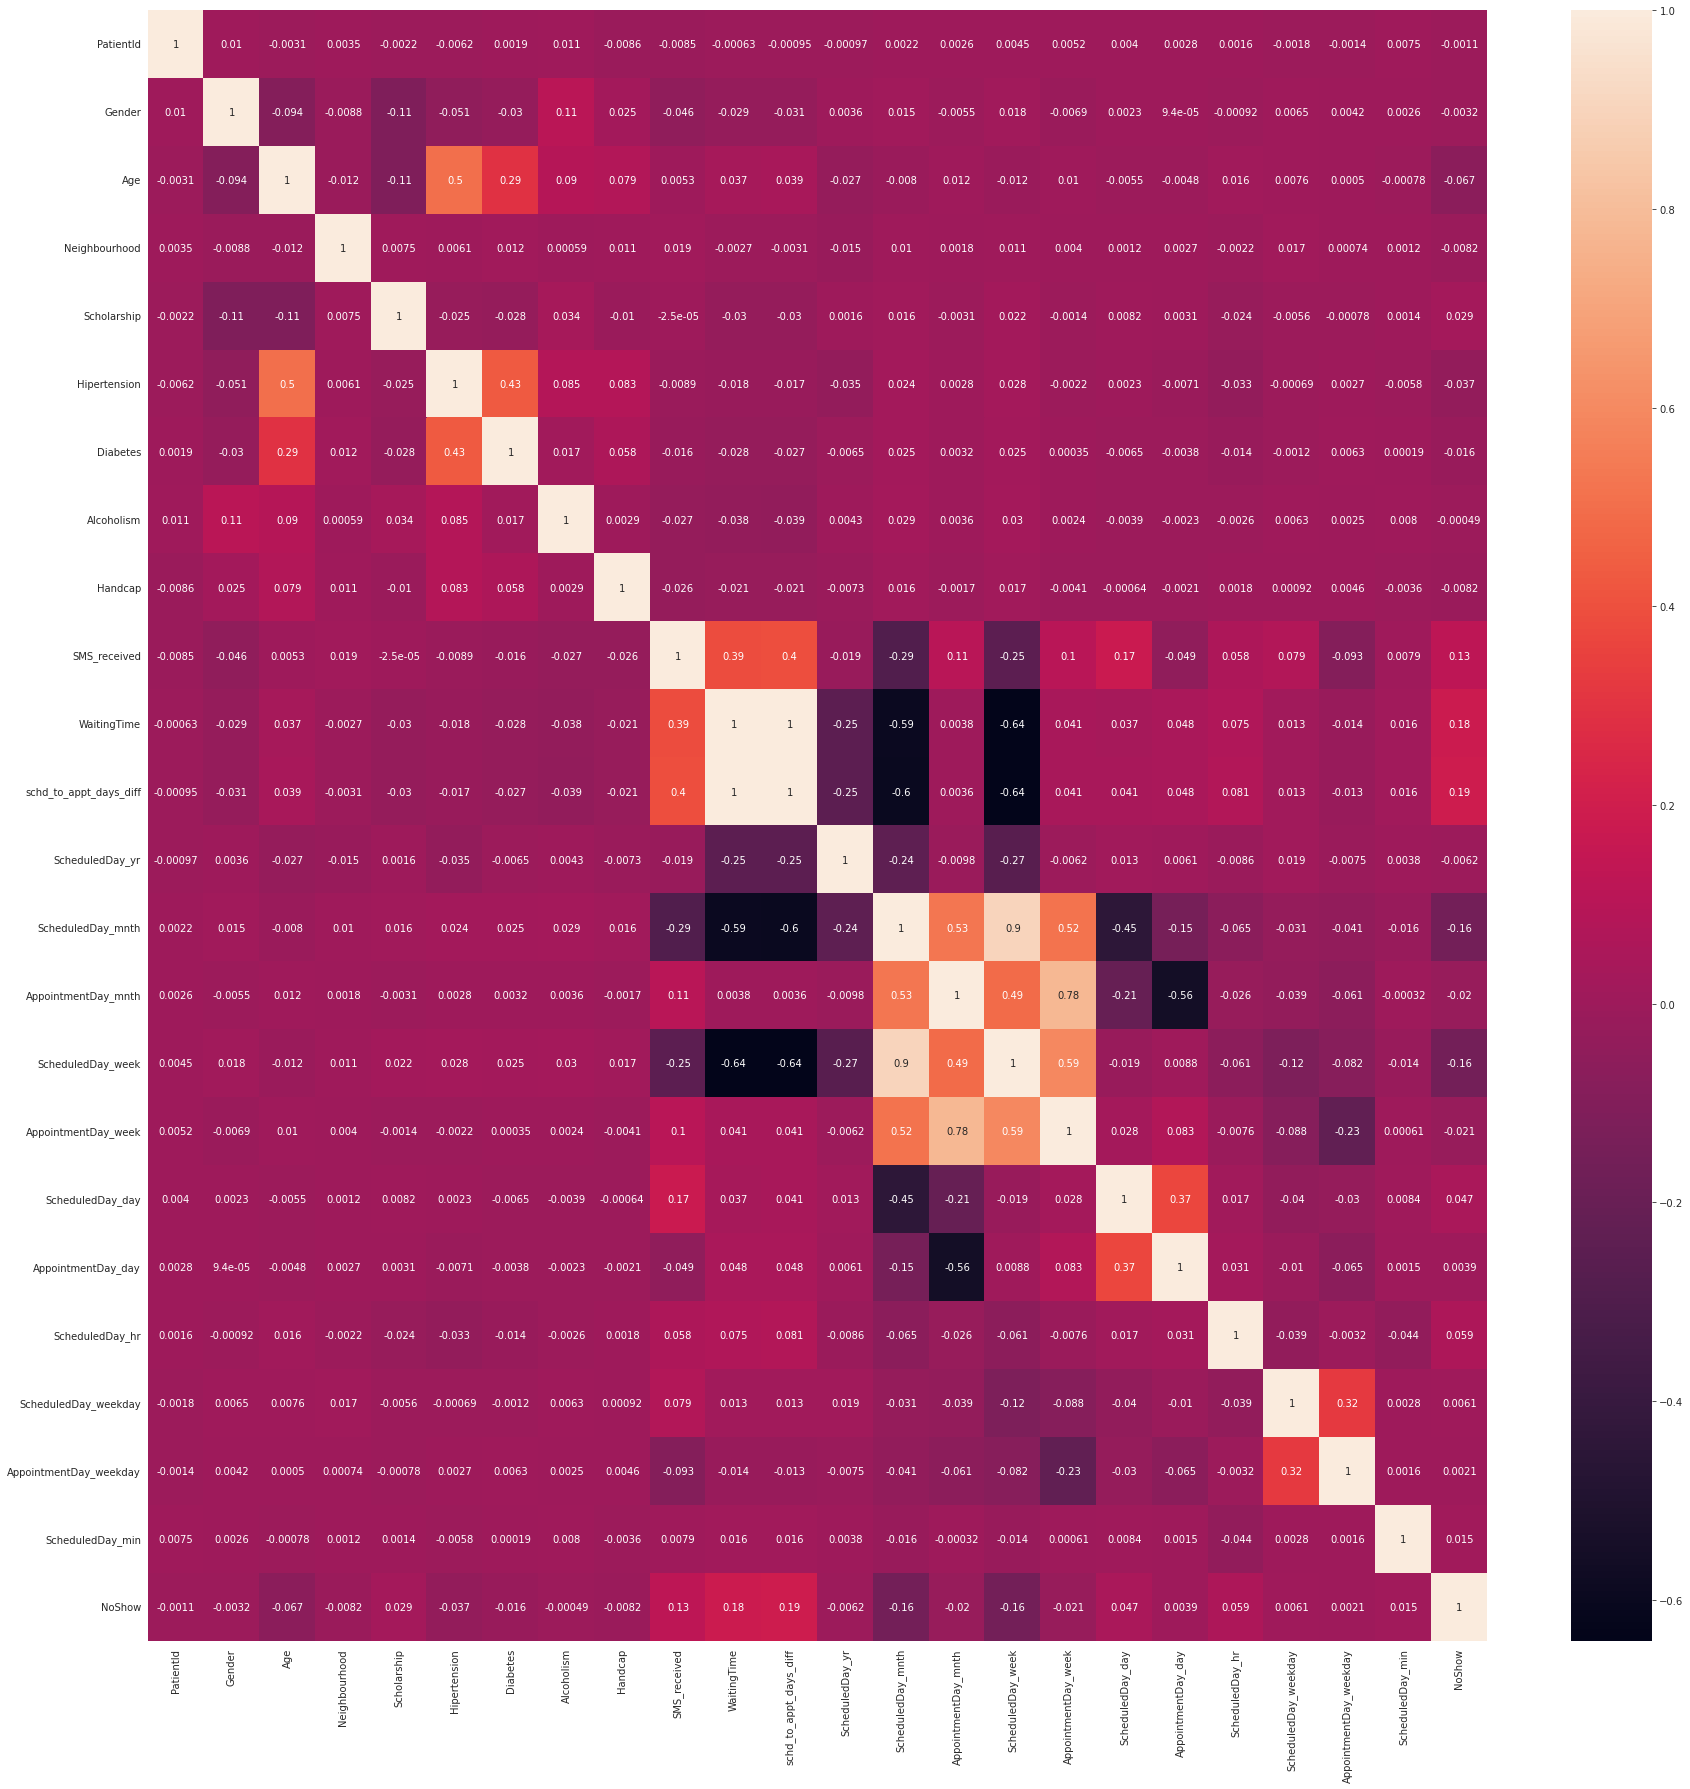

In [16]:
CleanDF_correlation = df.filter(['PatientId','Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','schd_to_appt_days_diff','ScheduledDay_yr','ScheduledDay_mnth','AppointmentDay_mnth','ScheduledDay_week','AppointmentDay_week','ScheduledDay_day','AppointmentDay_day','ScheduledDay_hr','ScheduledDay_weekday','AppointmentDay_weekday','ScheduledDay_min','NoShow'], axis=1)
# All of them numeric i.e. int/float
print(CleanDF_correlation.info())
fig, ax = plt.subplots(figsize=(30,30))
corrmat=CleanDF_correlation.corr()
sns.heatmap(corrmat, annot=True);

# B. Model Development

**Develop a Naïve Bayes classifier to predict the outcome of the test using Python. The performance of the classifier should be evaluated by partitioning the dataset into a train dataset (70%) and test dataset (30%). Use the train dataset to build the Naïve Bayes and the test dataset to evaluate how well the model generalizes to future results.**

In [17]:
CleanDF_correlation

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,schd_to_appt_days_diff,ScheduledDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_min,NoShow
0,2.987250e+13,0,0.603960,0.4875,0,1,0,0,0,0,0.776481,0,2016,4,4,17,17,29,29,18,4,4,38,0
1,5.589978e+14,1,0.544554,0.4875,0,0,0,0,0,0,0.672535,0,2016,4,4,17,17,29,29,16,4,4,8,0
2,4.262962e+12,0,0.603960,0.5625,0,0,0,0,0,0,0.679907,0,2016,4,4,17,17,29,29,16,4,4,19,0
3,8.679512e+11,0,0.069307,0.6750,0,0,0,0,0,0,0.728831,0,2016,4,4,17,17,29,29,17,4,4,29,0
4,8.841186e+12,0,0.544554,0.4875,0,1,1,0,0,0,0.671794,0,2016,4,4,17,17,29,29,16,4,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,0,0.544554,0.5375,0,0,0,0,0,1,34.614178,35,2016,5,6,18,23,3,7,9,1,1,15,0
110523,3.596266e+12,0,0.495050,0.5375,0,0,0,0,0,1,34.689201,35,2016,5,6,18,23,3,7,7,1,1,27,0
110524,1.557663e+13,0,0.198020,0.5375,0,0,0,0,0,1,40.330648,41,2016,4,6,17,23,27,7,16,2,1,3,0
110525,9.213493e+13,0,0.366337,0.5375,0,0,0,0,0,1,40.368484,41,2016,4,6,17,23,27,7,15,2,1,9,0


Try different features in X to see if the results get better.

X_CleanDF_correlation has three features in X 'SMS_received','schd_to_appt_days_diff','Neighbourhood'

X_CleanDF_correlation2 has more features in X regardless of the negative correlation. 'SMS_received','schd_to_appt_days_diff','ScheduledDay_week','Neighbourhood','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','Gender'

After the analysis and side by side comparison  of confusion matrices, classification tables and ROC curves, it is observed that the accuracy for each classifier decreases with the presence of more variables in X which have poor correlation with Y. Better results are achieved when X has fewer variables with better correlation. Side by side comparison  can be seen in  Assignment1_IAI5101_ZainUrRehman_ModelAnalysisAndComparison .pdf.


In [18]:
#X_CleanDF_correlation=CleanDF_correlation.filter(['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','schd_to_appt_days_diff','ScheduledDay_yr','ScheduledDay_mnth','AppointmentDay_mnth','ScheduledDay_week','AppointmentDay_week','ScheduledDay_day','AppointmentDay_day','ScheduledDay_hr','ScheduledDay_weekday','AppointmentDay_weekday','ScheduledDay_min'], axis=1)

# Only put those features in X which have higher correlation.
X_CleanDF_correlation=CleanDF_correlation.filter(['SMS_received','schd_to_appt_days_diff','Neighbourhood'], axis=1) # Keep it pandas.core.frame.DataFrame

# Another attempt to add more features regardless of negative correlation.
X_CleanDF_correlation2=CleanDF_correlation.filter(['SMS_received','schd_to_appt_days_diff','ScheduledDay_week','Neighbourhood','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','Gender'], axis=1) # Keep it pandas.core.frame.DataFrame

Y_CleanDF_correlation=CleanDF_correlation.filter(['NoShow'], axis=1).squeeze() # Change from pandas.core.frame.Dataframe to pandas.core.series.Series

In [19]:
# Split the Data Frame into X and y
# TRAIN TEST SPLIT Train: 70%, Test: 30%

# train_test_split based on X_CleanDF_correlation (few features in X with higher / positive correlation)
X_train, X_test, y_train, y_test= train_test_split(X_CleanDF_correlation,Y_CleanDF_correlation,stratify=Y_CleanDF_correlation, test_size=0.3,random_state=0)#splitting data in 70% train, 30%test

# Another train_test_split based on X_CleanDF_correlation1 (more features in X regardless of negative correlation)
X_train2, X_test2, y_train2, y_test2= train_test_split(X_CleanDF_correlation2,Y_CleanDF_correlation,stratify=Y_CleanDF_correlation, test_size=0.3,random_state=0)#splitting data in 70% train, 30%test


# stratify=Y_CleanDF_correlation. This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [20]:
# Naive Bayes. GaussianNB()
# Multinomial naive Bayes assumes to have feature vector where each element 
# represents the number of times it appears (or, very often, its frequency).
# The Gaussian Naive Bayes, instead, is based on a continuous distribution 
# and it's suitable for more generic classification tasks

# For this Assignment, I observed that using Multinomial naive Bayes was giving
# inconsitent results as the model was unable to make predictions for NoShow=Yes=1
# Predictions were better with GaussianNB() and hence, it was used.

GaussianNB_classifier = GaussianNB()
GaussianNB_classifier.fit(X_train, y_train)
y_pred_GaussianNB_classifier = GaussianNB_classifier.predict(X_test)

# Assignment 1, Part C: Model Evaluation & Comparison

Code along with the results can be found below. 

For the assignment, different features in X were also tried to see if the results get better.

X_CleanDF_correlation has three features in X 'SMS_received','schd_to_appt_days_diff','Neighbourhood'

X_CleanDF_correlation2 has more features in X regardless of the negative correlation. 'SMS_received','schd_to_appt_days_diff','ScheduledDay_week','Neighbourhood','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','Gender'

After the analysis and side by side comparison  of confusion matrices, classification tables and ROC curves, it is observed that the accuracy for each classifier decreases  with the presence of more variables in X which have poor correlation with Y. Better results are achieved when X has fewer variables with better correlation. Side by side comparision can be seen in  Assignment1_IAI5101_ZainUrRehman_ModelAnalysisAndComparision.pdf.



**Part C, question 1:**
=====================
To determine the model accuracy and to get all the matrices, I used confusion_matrix and accuracy_score.
Overfitting happens when we fit a lot more data than necessary. When a model fits more data than it actually needs, the model starts catching noisy data and inaccurate values from data set. Gaussian Naive Bayes Less Prone to Overfitting. It is sensitive to Outliers but we removed the outliers in the feature engineering phase. 

More loss between training and testing scores suggests over-fitting. Score for each model using .score was calculated. Not much loss was observed hence, there is no overfitting.

GaussianNB_classifier.score(X_train, y_train)

0.7778801597158234

GaussianNB_classifier.score(X_test, y_test)

0.7784009472175485

GaussianNB_classifier_grid.score(X_train, y_train)

0.7969632626897961

GaussianNB_classifier_grid.score(X_test, y_test)

0.7968156041627719

DecisionTree_classifier.score(X_train, y_train)

0.8181563238652297

DecisionTree_classifier.score(X_test, y_test)

0.7874369040942232

SVM_classifier.score(X_train, y_train)

0.7974173043280851

SVM_classifier.score(X_test, y_test)

0.797407615130554

Please scroll down to check the confusion matrices and classification report for each classifier.

**Part C, question 2:**
=====================
GaussianNB_classifier was tuned using gridsearchCV. tuned 'var_smoothing' for Gaussian Naive Bayes model. 'var_smoothing': np.logspace(0,-9, num=5)

**Part C, question 3:**
=====================
Accuracy, Sensitivity and Specificity

From confusion matrices, we get the following measures for each model:

True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No

False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No

True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes

False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

--

These are the **formulas for Accuracy, Sensitivity, Specificity**:

Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN

Sensitivity aka Recall or true positive rate (true positives / all actual positives) = TP / TP + FN

Specificity aka true negative rate (true negatives / all actual negatives) =TN / TN + FP

--

Accuracy answers the question: How many patients did we correctly identify out of all patients who will miss or not miss the appointments

Sensitivity answers the question: Of all the patients that are NoShow = 1, how many did the test correctly predict that NoShow = 1

Specificity answers the question: Of all the patients that are NoShow = 0, how many did the test correctly predict that NoShow = 0

--

Based on the formulas, here are the **results for Accuracy, Sensitivity, Specificity**.

Accuracy_GaussianNB:  0.7784009472175485

Specificity_GaussianNB:  0.9567442950922164

Sensitivity_GaussianNB:  0.07643801907105506

Accuracy_GaussianNB_tuned:  0.7946968280675516

Specificity_GaussianNB_tuned:  0.9935135979993748

Sensitivity_GaussianNB_tuned:  0.012150107659181791

Accuracy_DecisionTree:  0.7874680625662117

Specificity_DecisionTree:  0.9627618005626758

Sensitivity_DecisionTree:  0.09750845893571208

Accuracy_SVM:  0.7973764566585655

Specificity_SVM:  0.9999609252891528

Sensitivity_SVM:  0.0

All models are about the same in terms of Specificity (TN / TN + FP). Meaning they are good in predicting: of all the patients that are NoShow = 0, how many did the test correctly predict that NoShow = 0. 

All models have low Sensitivity (TP / TP + FN) score and not that great in predicting: Of all the patients that are NoShow = 1, how many did the test correctly predict that NoShow = 1. Sensitivity for SVM is 0, as it was unable to predict any true positive.

Based on the results, we can conclude that **GaussianNB_tuned will be the best model as it has the highest accuracy**. And **SVM is the worst model with 0 Sensitivity**. Its Specificity is highest in all 0.99 and it is good in predicting NoShow = 0, but due to its inablility to predict NoShow = 1 (0 Sensitivity), we consider it as the worst model.



**Part C, Question 4:**
=====================
Two important ratios in understanding ROC curve:

The portion of actual positive examples that the model has predicted correctly

Sensitivity, True Positive Rate TPR = TP / (TP + FN)

The number of negative examples that the model has predicted correctly.

False Positive Rate FPR = FP / (FP + TN)

Specificity = 1 - FPR

In the ROC analysis, I plotted FPR on X axis and TPR on Y axis.

Please scroll down to the notebook and refer to he ROC curve. Here is the summary of the ROC analysis. **Based on the area under the curve (auc), GaussianNB_tuned is the best model**.
SVM (auc=0.662), DecisionTree (auc = 0.676), GaussianNB (auc = 0.697), GaussianNB_tuned(auc=0.697)

<>================================================================================================<>
<>============================== GaussianNB_classifier RESULTS: ==================================<>
<>================================================================================================<>

<>-----The 5 fold GaussianNB_classifier_Score cross validation: ----------<>
[0.77892769 0.77966215 0.78012953 0.77677618 0.77524038]

<>-----GaussianNB_classifier_Score Mean and Standard Deviation: ----------<>
0.7781471859058533 0.001852736204467855

<>-----GaussianNB_classifier confusion_matrix: ---------------------------<>
[[24485  1107]
 [ 6005   497]]

<>-----GaussianNB_classifier accuracy: -----------------------------------<>
0.7784009472175485

<>-----GaussianNB_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     25592
           1       0.31      0.08      0.12      65

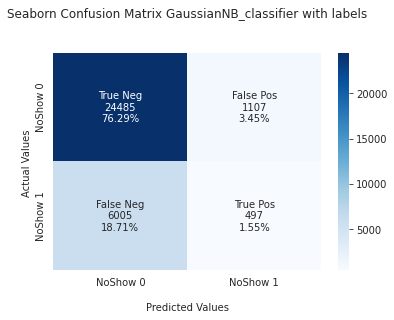

In [21]:
print("<>================================================================================================<>")
print("<>============================== GaussianNB_classifier RESULTS: ==================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_GaussianNB_classifier = confusion_matrix(y_test, y_pred_GaussianNB_classifier)
accuracy_GaussianNB_classifier = accuracy_score(y_test, y_pred_GaussianNB_classifier)
# cross_val_score
GaussianNB_classifier_Score = cross_val_score(GaussianNB_classifier, X_train, y_train, cv=5)
print("\n<>-----The 5 fold GaussianNB_classifier_Score cross validation: ----------<>")
print(GaussianNB_classifier_Score)
# Getting mean
print("\n<>-----GaussianNB_classifier_Score Mean and Standard Deviation: ----------<>")
print(GaussianNB_classifier_Score.mean(), GaussianNB_classifier_Score.std())
print("\n<>-----GaussianNB_classifier confusion_matrix: ---------------------------<>")
print(cm_GaussianNB_classifier)
print("\n<>-----GaussianNB_classifier accuracy: -----------------------------------<>")
print(accuracy_GaussianNB_classifier)
print("\n<>-----GaussianNB_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_GaussianNB_classifier))
print("\n<>-----GaussianNB_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_GaussianNB_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_GaussianNB_classifier.flatten()/np.sum(cm_GaussianNB_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_GaussianNB_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix GaussianNB_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [22]:
# Tune the model using GridSearchCV
# Reference https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
# Grid search only performed on the training set.
print("<>================================================================================================<>")
print("<>==================== GaussianNB_classifier RESULTS with GridSearchCV Tuning: ===================<>")
print("<>================================================================================================<>")
print("\n<>----------- GaussianNB_classifier.get_params-----------------------------<>")
print(GaussianNB_classifier.get_params())
#params = {'alpha': [0.5, 1.0, 10.0],'fit_prior': [True, False]}
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=5)
}
GaussianNB_classifier_grid=GridSearchCV(GaussianNB_classifier, param_grid=param_grid_nb, n_jobs=-1, cv=2, verbose=5)
GaussianNB_classifier_grid.fit(X_train, y_train)
print("\n<>----------- GaussianNB_classifier_grid.cv_results_-----------------------<>")
print(GaussianNB_classifier_grid.cv_results_)
GaussianNB_classifier_grid_df = pd.DataFrame(GaussianNB_classifier_grid.cv_results_)
print("\n<>----------- GaussianNB_classifier_grid.cv_results_ as dataframe----------<>")
GaussianNB_classifier_grid_df

<>================================================================================================<>
<>==================== GaussianNB_classifier RESULTS with GridSearchCV Tuning: ===================<>
<>================================================================================================<>

<>----------- GaussianNB_classifier.get_params-----------------------------<>
{'priors': None, 'var_smoothing': 1e-09}
Fitting 2 folds for each of 5 candidates, totalling 10 fits

<>----------- GaussianNB_classifier_grid.cv_results_-----------------------<>
{'mean_fit_time': array([0.01619244, 0.02449238, 0.02386141, 0.023242  , 0.01491451]), 'std_fit_time': array([0.00025368, 0.00688422, 0.00475097, 0.00344992, 0.00175214]), 'mean_score_time': array([0.00907981, 0.01058221, 0.0090121 , 0.01063907, 0.00813615]), 'std_score_time': array([0.00049937, 0.00012779, 0.00017798, 0.00086081, 0.001773  ]), 'param_var_smoothing': masked_array(data=[1.0, 0.005623413251903491, 3.1622776601683795e-05

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016192,0.000254,0.009080,0.000499,1.0,{'var_smoothing': 1.0},0.795684,0.793088,0.794386,0.001298,1
1,0.024492,0.006884,0.010582,0.000128,0.005623,{'var_smoothing': 0.005623413251903491},0.783852,0.780748,0.782300,0.001552,2
2,0.023861,0.004751,0.009012,0.000178,0.000032,{'var_smoothing': 3.1622776601683795e-05},0.780995,0.776609,0.778802,0.002193,3
3,0.023242,0.003450,0.010639,0.000861,0.0,{'var_smoothing': 1.7782794100389227e-07},0.780701,0.775594,0.778147,0.002554,4
4,0.014915,0.001752,0.008136,0.001773,0.0,{'var_smoothing': 1e-09},0.780701,0.775594,0.778147,0.002554,4


<>================================================================================================<>
<>============================== GaussianNB_classifier_grid RESULTS: =============================<>
<>================================================================================================<>
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits

<>-----The 5 fold GaussianNB_classifier_tuned_Score cross validation: ----------<>
[0.7950858  0.79468518 0.79461841 0.79440438 0.79306891]

<>-----GaussianNB_classifier_tuned_Score Mean and Standard Deviation: ----------<>
0.7943725375347612 0.000688099166728106

<>-----GaussianNB_classifier_grid confusion_matrix: ---------------------------<>
[[25426   166]
 [ 6423    79]]

<>-----GaussianNB

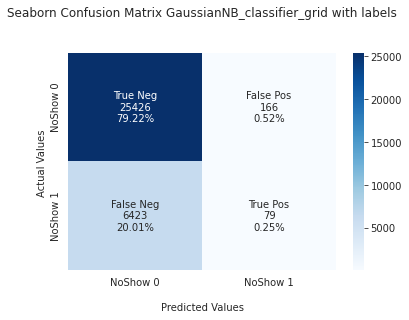

In [23]:
# Use the GaussianNB_classifier_grid model to predict the testing data.
# The tuned model will be named as y_pred_GaussianNB_classifier_tuned
y_pred_GaussianNB_classifier_tuned = GaussianNB_classifier_grid.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== GaussianNB_classifier_grid RESULTS: =============================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_GaussianNB_classifier_tuned = confusion_matrix(y_test, y_pred_GaussianNB_classifier_tuned)
accuracy_GaussianNB_classifier_tuned = accuracy_score(y_test, y_pred_GaussianNB_classifier_tuned)
# cross_val_score
GaussianNB_classifier_tuned_Score = cross_val_score(GaussianNB_classifier_grid, X_train, y_train, cv=5)
print("\n<>-----The 5 fold GaussianNB_classifier_tuned_Score cross validation: ----------<>")
print(GaussianNB_classifier_tuned_Score)
# Getting mean
print("\n<>-----GaussianNB_classifier_tuned_Score Mean and Standard Deviation: ----------<>")
print(GaussianNB_classifier_tuned_Score.mean(), GaussianNB_classifier_tuned_Score.std())
print("\n<>-----GaussianNB_classifier_grid confusion_matrix: ---------------------------<>")
print(cm_GaussianNB_classifier_tuned)
print("\n<>-----GaussianNB_classifier_grid accuracy: -----------------------------------<>")
print(accuracy_GaussianNB_classifier_tuned)
print("\n<>-----GaussianNB_classifier_grid Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_GaussianNB_classifier_tuned))
print("\n<>-----GaussianNB_classifier_grid confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_GaussianNB_classifier_tuned.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_GaussianNB_classifier_tuned.flatten()/np.sum(cm_GaussianNB_classifier_tuned)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_GaussianNB_classifier_tuned, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix GaussianNB_classifier_grid with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


Using the same data set partitioning method, evaluate the performance of a SVM and Decision tree classifier on the dataset. Compare the results of the Naïve Bayes classifier and SVM with the Decision model according to the following criteria: Accuracy, Sensitivity and Specificity. Identify the model that  performed best and worst according to each criterion.

In [24]:
#Decision tree classifier
DecisionTree_classifier = DecisionTreeClassifier()
DecisionTree_classifier.fit(X_train, y_train)
y_pred_DecisionTree_classifier = DecisionTree_classifier.predict(X_test)

<>================================================================================================<>
<>============================== DecisionTree_classifier RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold DecisionTree_classifier_Score cross validation: ----------<>
[0.78894305 0.7875409  0.7849369  0.78766026 0.78104968]

<>----- DecisionTree_classifier_Score Mean and Standard Deviation: ----------<>
0.7860261562387114 0.002808015629176998

<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>
[[24641   951]
 [ 5866   636]]

<>----- DecisionTree_classifier accuracy: -----------------------------------<>
0.7875926964541659

<>----- DecisionTree_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     25592
           1       0.40      0.10   

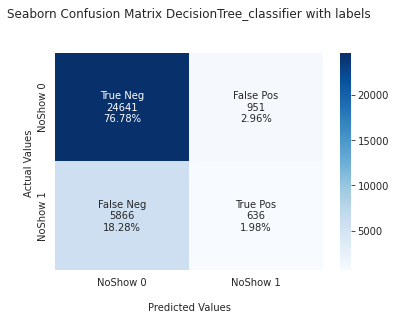

In [25]:
print("<>================================================================================================<>")
print("<>============================== DecisionTree_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_DecisionTree_classifier = confusion_matrix(y_test, y_pred_DecisionTree_classifier)
accuracy_DecisionTree_classifier = accuracy_score(y_test, y_pred_DecisionTree_classifier)
# cross_val_score
DecisionTree_classifier_Score = cross_val_score(DecisionTree_classifier, X_train, y_train, cv=5)
print("\n<>----- The 5 fold DecisionTree_classifier_Score cross validation: ----------<>")
print(DecisionTree_classifier_Score)
# Getting mean
print("\n<>----- DecisionTree_classifier_Score Mean and Standard Deviation: ----------<>")
print(DecisionTree_classifier_Score.mean(), DecisionTree_classifier_Score.std())
print("\n<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>")
print(cm_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier accuracy: -----------------------------------<>")
print(accuracy_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_DecisionTree_classifier))
print("\n<>----- DecisionTree_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_DecisionTree_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_DecisionTree_classifier.flatten()/np.sum(cm_DecisionTree_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_DecisionTree_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix DecisionTree_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [26]:
#SVM classifier This cell takes about 30 MINUTES to complete.
#                                     ==========

SVM_classifier =  svm.SVC(probability=True)
SVM_classifier.fit(X_train, y_train)
y_pred_SVM_classifier = SVM_classifier.predict(X_test)
SVM_classifier_Score = cross_val_score(SVM_classifier, X_train, y_train, cv=2)

<>================================================================================================<>
<>================================= SVM_classifier RESULTS: ======================================<>
<>================================================================================================<>

<>-------------- The 2 fold SVM_classifier_Score cross validation: -------<>
[0.79736659 0.79736118]

<>----------- SVM_classifier_Score Mean and Standard Deviation: ----------<>
0.7973638876286202 2.706036248134591e-06

<>----------- SVM_classifier confusion_matrix: ---------------------------<>
[[25591     1]
 [ 6502     0]]

<>----------- SVM_classifier accuracy: -----------------------------------<>
0.7973764566585655

<>----------- SVM_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     25592
           1       0.00      0.00      0.00      6502

    accuracy                

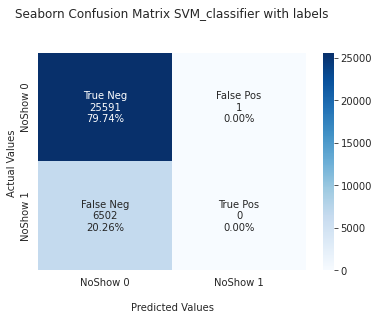

In [27]:
print("<>================================================================================================<>")
print("<>================================= SVM_classifier RESULTS: ======================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_SVM_classifier = confusion_matrix(y_test, y_pred_SVM_classifier)
accuracy_SVM_classifier = accuracy_score(y_test, y_pred_SVM_classifier)
# cross_val_score
print("\n<>-------------- The 2 fold SVM_classifier_Score cross validation: -------<>")
print(SVM_classifier_Score)
# Getting mean
print("\n<>----------- SVM_classifier_Score Mean and Standard Deviation: ----------<>")
print(SVM_classifier_Score.mean(), SVM_classifier_Score.std())
print("\n<>----------- SVM_classifier confusion_matrix: ---------------------------<>")
print(cm_SVM_classifier)
print("\n<>----------- SVM_classifier accuracy: -----------------------------------<>")
print(accuracy_SVM_classifier)
print("\n<>----------- SVM_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_SVM_classifier))
print("\n<>----------- SVM_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_SVM_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_SVM_classifier.flatten()/np.sum(cm_SVM_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_SVM_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix SVM_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Compare the results of the Naïve Bayes classifier and SVM with the Decision model according to the following criteria: Accuracy, Sensitivity and Specificity. Identify the model that performed best and worst according to each criterion.**

In [28]:
#Accuracy, Sensitivity and Specificity 
#Accuracy — Ratio of correct predictions to total predictions
#Accuracy = (TP+TN)/(TP+FP+FN+TN)
#Sensitivity/Recall — Ratio of true positives to total (actual) positives in the data.
#Sensitivity or Recall = TP/(TP+FN)
#Precision — Ratio of true positives to total predicted positives.
#Precision = TP/(TP+FP)
#Specificity — Ratio of true negatives to total negatives in the data.
#Specificity = TN/(TN+FP)
#F1-Score — Considers both precision and recall. It’s the harmonic mean of the precision and recall.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print("\n<>-----GaussianNB_classifier confusion_matrix: ---------------------------<>")
print(cm_GaussianNB_classifier)
print("\n<>-----GaussianNB_classifier accuracy: -----------------------------------<>")
print(accuracy_GaussianNB_classifier)
print("\n<>-----GaussianNB_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_GaussianNB_classifier))

print("\n=================================================================================")

print("\n<>-----GaussianNB_classifier_tuned confusion_matrix: ---------------------------<>")
print(cm_GaussianNB_classifier_tuned)
print("\n<>-----GaussianNB_classifier_tuned accuracy: -----------------------------------<>")
print(accuracy_GaussianNB_classifier_tuned)
print("\n<>-----GaussianNB_classifier_tuned Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_GaussianNB_classifier_tuned))

print("\n=================================================================================")

print("\n<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>")
print(cm_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier accuracy: -----------------------------------<>")
print(accuracy_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_DecisionTree_classifier))

print("\n=================================================================================")

print("\n<>----------- SVM_classifier confusion_matrix: ---------------------------<>")
print(cm_SVM_classifier)
print("\n<>----------- SVM_classifier accuracy: -----------------------------------<>")
print(accuracy_SVM_classifier)
print("\n<>----------- SVM_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_SVM_classifier))



<>-----GaussianNB_classifier confusion_matrix: ---------------------------<>
[[24485  1107]
 [ 6005   497]]

<>-----GaussianNB_classifier accuracy: -----------------------------------<>
0.7784009472175485

<>-----GaussianNB_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     25592
           1       0.31      0.08      0.12      6502

    accuracy                           0.78     32094
   macro avg       0.56      0.52      0.50     32094
weighted avg       0.70      0.78      0.72     32094



<>-----GaussianNB_classifier_tuned confusion_matrix: ---------------------------<>
[[25426   166]
 [ 6423    79]]

<>-----GaussianNB_classifier_tuned accuracy: -----------------------------------<>
0.7946968280675516

<>-----GaussianNB_classifier_tuned Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      0.

In [29]:
# More loss between training validation scores suggests over-fitting
# No over-fitting as not much delta between training and testing scores.
print(GaussianNB_classifier.score(X_train, y_train))
print(GaussianNB_classifier.score(X_test, y_test))

print(GaussianNB_classifier_grid.score(X_train, y_train))
print(GaussianNB_classifier_grid.score(X_test, y_test))

print(DecisionTree_classifier.score(X_train, y_train))
print(DecisionTree_classifier.score(X_test, y_test))

print(SVM_classifier.score(X_train, y_train))
print(SVM_classifier.score(X_test, y_test))

0.7778801597158234
0.7784009472175485
0.794345846186718
0.7946968280675516
0.8181563238652297
0.7875926964541659
0.7974173043280851
0.7973764566585655


In [30]:
print("<>================================================================================================<>")
print("<>============================ Accuracy,Specificity,Sensitivity using formulas  ==================<>")
print("<>================================================================================================<>")

print("\n==================================================================================================")
total1_GaussianNB=sum(sum(cm_GaussianNB_classifier))
Accuracy_GaussianNB = (cm_GaussianNB_classifier[0,0]+cm_GaussianNB_classifier[1,1])/total1_GaussianNB
Specificity_GaussianNB = cm_GaussianNB_classifier[0,0]/(cm_GaussianNB_classifier[0,0]+cm_GaussianNB_classifier[0,1])
Sensitivity_GaussianNB = cm_GaussianNB_classifier[1,1]/(cm_GaussianNB_classifier[1,0]+cm_GaussianNB_classifier[1,1])
print("Accuracy_GaussianNB: ", Accuracy_GaussianNB)
print("Specificity_GaussianNB: ", Specificity_GaussianNB)
print("Sensitivity_GaussianNB: ", Sensitivity_GaussianNB)
print("\n==================================================================================================")
total1_GaussianNB_tuned=sum(sum(cm_GaussianNB_classifier_tuned))
Accuracy_GaussianNB_tuned = (cm_GaussianNB_classifier_tuned[0,0]+cm_GaussianNB_classifier_tuned[1,1])/total1_GaussianNB_tuned
Specificity_GaussianNB_tuned = cm_GaussianNB_classifier_tuned[0,0]/(cm_GaussianNB_classifier_tuned[0,0]+cm_GaussianNB_classifier_tuned[0,1])
Sensitivity_GaussianNB_tuned = cm_GaussianNB_classifier_tuned[1,1]/(cm_GaussianNB_classifier_tuned[1,0]+cm_GaussianNB_classifier_tuned[1,1])
print("Accuracy_GaussianNB_tuned: ", Accuracy_GaussianNB_tuned)
print("Specificity_GaussianNB_tuned: ", Specificity_GaussianNB_tuned)
print("Sensitivity_GaussianNB_tuned: ", Sensitivity_GaussianNB_tuned)
print("\n==================================================================================================")
total1_DecisionTree=sum(sum(cm_DecisionTree_classifier))
Accuracy_DecisionTree = (cm_DecisionTree_classifier[0,0]+cm_DecisionTree_classifier[1,1])/total1_DecisionTree
Specificity_DecisionTree = cm_DecisionTree_classifier[0,0]/(cm_DecisionTree_classifier[0,0]+cm_DecisionTree_classifier[0,1])
Sensitivity_DecisionTree = cm_DecisionTree_classifier[1,1]/(cm_DecisionTree_classifier[1,0]+cm_DecisionTree_classifier[1,1])
print("Accuracy_DecisionTree: ", Accuracy_DecisionTree)
print("Specificity_DecisionTree: ", Specificity_DecisionTree)
print("Sensitivity_DecisionTree: ", Sensitivity_DecisionTree)
print("\n==================================================================================================")
total1_SVM=sum(sum(cm_SVM_classifier))
Accuracy_SVM = (cm_SVM_classifier[0,0]+cm_SVM_classifier[1,1])/total1_SVM
Specificity_SVM = cm_SVM_classifier[0,0]/(cm_SVM_classifier[0,0]+cm_SVM_classifier[0,1])
Sensitivity_SVM = cm_SVM_classifier[1,1]/(cm_SVM_classifier[1,0]+cm_SVM_classifier[1,1])
print("Accuracy_SVM: ", Accuracy_SVM)
print("Specificity_SVM: ", Specificity_SVM)
print("Sensitivity_SVM: ", Sensitivity_SVM)
	


<>================================================================================================<>
<>============================ Accuracy,Specificity,Sensitivity using formulas  ==================<>
<>================================================================================================<>

Accuracy_GaussianNB:  0.7784009472175485
Specificity_GaussianNB:  0.9567442950922164
Sensitivity_GaussianNB:  0.07643801907105506

Accuracy_GaussianNB_tuned:  0.7946968280675516
Specificity_GaussianNB_tuned:  0.9935135979993748
Sensitivity_GaussianNB_tuned:  0.012150107659181791

Accuracy_DecisionTree:  0.7875926964541659
Specificity_DecisionTree:  0.9628399499843702
Sensitivity_DecisionTree:  0.09781605659796985

Accuracy_SVM:  0.7973764566585655
Specificity_SVM:  0.9999609252891528
Sensitivity_SVM:  0.0


In [31]:
#Receiver Operating Characteristic (ROC) Curve
#AUC (Area Under the Curve)
#Reference: https://medium.com/analytics-vidhya/how-to-select-performance-metrics-for-classification-models-c847fe6b1ea3
#Reference: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

# predict probabilities
GaussianNB_classifier_pred_prob = GaussianNB_classifier.predict_proba(X_test)
GaussianNB_classifier_grid_pred_prob = GaussianNB_classifier_grid.predict_proba(X_test)
DecisionTree_classifier_pred_prob = DecisionTree_classifier.predict_proba(X_test)
SVM_classifier_pred_prob = SVM_classifier.predict_proba(X_test)
# Positive predictions.
GaussianNB_classifier_pred_prob = GaussianNB_classifier_pred_prob[:,1]
DecisionTree_classifier_pred_prob = DecisionTree_classifier_pred_prob[:,1]
SVM_classifier_pred_prob = SVM_classifier_pred_prob[:,1]
GaussianNB_classifier_grid_pred_prob = GaussianNB_classifier_grid_pred_prob[:,1]

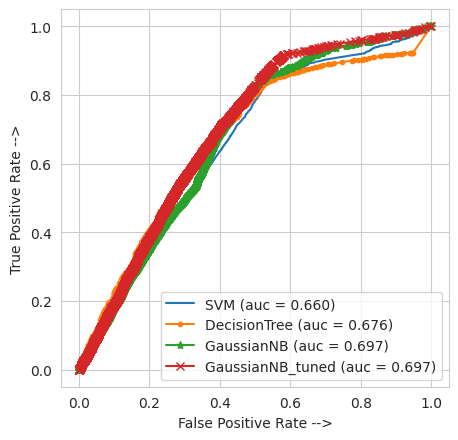

In [32]:
GaussianNB_classifier_fpr, GaussianNB_classifier_tpr, threshold = roc_curve(y_test, GaussianNB_classifier_pred_prob)
auc_GaussianNB_classifier = auc(GaussianNB_classifier_fpr, GaussianNB_classifier_tpr)

GaussianNB_classifier_grid_fpr, GaussianNB_classifier_grid_tpr, threshold = roc_curve(y_test, GaussianNB_classifier_grid_pred_prob) #new linw
auc_GaussianNB_classifier = auc(GaussianNB_classifier_grid_fpr, GaussianNB_classifier_grid_tpr) # new line

DecisionTree_classifier_fpr, DecisionTree_classifier_tpr, threshold = roc_curve(y_test, DecisionTree_classifier_pred_prob)
auc_DecisionTree_classifier = auc(DecisionTree_classifier_fpr, DecisionTree_classifier_tpr)

SVM_classifier_fpr, SVM_classifier_tpr, threshold = roc_curve(y_test, SVM_classifier_pred_prob)
auc_SVM_classifier = auc(SVM_classifier_fpr, SVM_classifier_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(SVM_classifier_fpr, SVM_classifier_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_SVM_classifier)
plt.plot(DecisionTree_classifier_fpr, DecisionTree_classifier_tpr, marker='.', label='DecisionTree (auc = %0.3f)' % auc_DecisionTree_classifier)
plt.plot(GaussianNB_classifier_fpr, GaussianNB_classifier_tpr, marker='*', label='GaussianNB (auc = %0.3f)' % auc_GaussianNB_classifier)
plt.plot(GaussianNB_classifier_grid_fpr, GaussianNB_classifier_grid_tpr, marker='x', label='GaussianNB_tuned (auc = %0.3f)' % auc_GaussianNB_classifier)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


**Part B and Part C of the assignment based on based on X_CleanDF_correlation1 (more features in X regardless of negative correlation)**

<>================================================================================================<>
<>============================== GaussianNB_classifier2 RESULTS (more features in X): =============<>
<>================================================================================================<>

<>-----The 5 fold GaussianNB_classifier_Score2 cross validation: ----------<>
[0.76210189 0.76377112 0.76824464 0.7623531  0.75928152]

<>-----GaussianNB_classifier_Score2 Mean and Standard Deviation: ----------<>
0.7631504524886877 0.002933936141935759

<>-----GaussianNB_classifier2 confusion_matrix: ---------------------------<>
[[23292  2300]
 [ 5332  1170]]

<>-----GaussianNB_classifier2 accuracy: -----------------------------------<>
0.762198541783511

<>-----GaussianNB_classifier2 Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     25592
           1       0.34      0.18      0.23   

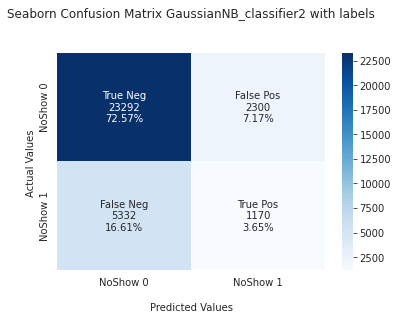

<>================================================================================================<>
<>============================== DecisionTree_classifier2 RESULTS (more features in X): ========<>
<>================================================================================================<>

<>----- The 5 fold DecisionTree_classifier_Score2 cross validation: ----------<>
[0.721306   0.72270815 0.72511184 0.71875    0.71621261]

<>----- DecisionTree_classifier_Score2 Mean and Standard Deviation: ----------<>
0.7208177200054329 0.0030897941295126544

<>----- DecisionTree_classifier2 confusion_matrix: ---------------------------<>
[[21106  4486]
 [ 4314  2188]]

<>----- DecisionTree_classifier2 accuracy: -----------------------------------<>
0.7258054465009036

<>----- DecisionTree_classifier2 Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     25592
           1       0.33      0.3

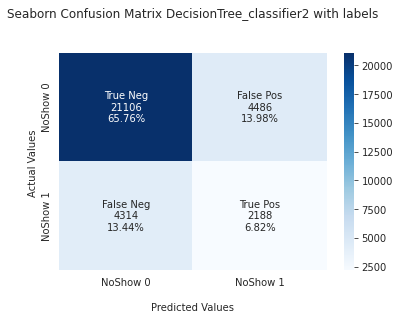

<>================================================================================================<>
<>================================= SVM_classifier2 RESULTS (more features in X): ================<>
<>================================================================================================<>

<>-------------- The 2 fold SVM_classifier_Score2 cross validation: -------<>
[0.79744672 0.7974146 ]

<>----------- SVM_classifier_Score2 Mean and Standard Deviation: ----------<>
0.7974306582794585 1.6059310413818473e-05

<>----------- SVM_classifier2 confusion_matrix: ---------------------------<>
[[25592     0]
 [ 6502     0]]

<>----------- SVM_classifier2 accuracy: -----------------------------------<>
0.797407615130554

<>----------- SVM_classifier2 Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     25592
           1       0.00      0.00      0.00      6502

    accuracy           

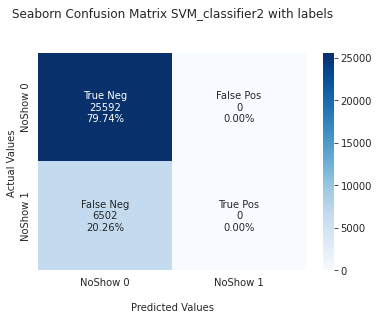

In [33]:
# This cell will take about 30 minutes to execute as SVM model code also included in the cell


# Naive Bayes. GaussianNB() based on X_CleanDF_correlation1 (more features in X regardless of negative correlation)

GaussianNB_classifier2 = GaussianNB()
GaussianNB_classifier2.fit(X_train2, y_train2)
y_pred_GaussianNB_classifier2 = GaussianNB_classifier2.predict(X_test2)

print("<>================================================================================================<>")
print("<>============================== GaussianNB_classifier2 RESULTS (more features in X): =============<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_GaussianNB_classifier2 = confusion_matrix(y_test2, y_pred_GaussianNB_classifier2)
accuracy_GaussianNB_classifier2 = accuracy_score(y_test2, y_pred_GaussianNB_classifier2)
# cross_val_score
GaussianNB_classifier_Score2 = cross_val_score(GaussianNB_classifier2, X_train2, y_train2, cv=5)
print("\n<>-----The 5 fold GaussianNB_classifier_Score2 cross validation: ----------<>")
print(GaussianNB_classifier_Score2)
# Getting mean
print("\n<>-----GaussianNB_classifier_Score2 Mean and Standard Deviation: ----------<>")
print(GaussianNB_classifier_Score2.mean(), GaussianNB_classifier_Score2.std())
print("\n<>-----GaussianNB_classifier2 confusion_matrix: ---------------------------<>")
print(cm_GaussianNB_classifier2)
print("\n<>-----GaussianNB_classifier2 accuracy: -----------------------------------<>")
print(accuracy_GaussianNB_classifier2)
print("\n<>-----GaussianNB_classifier2 Classification report: ----------------------<>")
print(metrics.classification_report(y_test2, y_pred_GaussianNB_classifier2))
print("\n<>-----GaussianNB_classifier2 confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_GaussianNB_classifier2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_GaussianNB_classifier2.flatten()/np.sum(cm_GaussianNB_classifier2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_GaussianNB_classifier2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix GaussianNB_classifier2 with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


# Decision tree classifierbased on X_CleanDF_correlation1 (more features in X regardless of negative correlation)
# Decision tree classifier

DecisionTree_classifier2 = DecisionTreeClassifier()
DecisionTree_classifier2.fit(X_train2, y_train2)
y_pred_DecisionTree_classifier2 = DecisionTree_classifier2.predict(X_test2)

print("<>================================================================================================<>")
print("<>============================== DecisionTree_classifier2 RESULTS (more features in X): ========<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_DecisionTree_classifier2 = confusion_matrix(y_test2, y_pred_DecisionTree_classifier2)
accuracy_DecisionTree_classifier2 = accuracy_score(y_test2, y_pred_DecisionTree_classifier2)
# cross_val_score
DecisionTree_classifier_Score2 = cross_val_score(DecisionTree_classifier2, X_train2, y_train2, cv=5)
print("\n<>----- The 5 fold DecisionTree_classifier_Score2 cross validation: ----------<>")
print(DecisionTree_classifier_Score2)
# Getting mean
print("\n<>----- DecisionTree_classifier_Score2 Mean and Standard Deviation: ----------<>")
print(DecisionTree_classifier_Score2.mean(), DecisionTree_classifier_Score2.std())
print("\n<>----- DecisionTree_classifier2 confusion_matrix: ---------------------------<>")
print(cm_DecisionTree_classifier2)
print("\n<>----- DecisionTree_classifier2 accuracy: -----------------------------------<>")
print(accuracy_DecisionTree_classifier2)
print("\n<>----- DecisionTree_classifier2 Classification report: ----------------------<>")
print(metrics.classification_report(y_test2, y_pred_DecisionTree_classifier2))
print("\n<>----- DecisionTree_classifier2 confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_DecisionTree_classifier2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_DecisionTree_classifier2.flatten()/np.sum(cm_DecisionTree_classifier2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_DecisionTree_classifier2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix DecisionTree_classifier2 with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


# SVM_classifier based on X_CleanDF_correlation1 (more features in X regardless of negative correlation)
# SVM_classifier

SVM_classifier2 =  svm.SVC(probability=True)
SVM_classifier2.fit(X_train2, y_train2)
y_pred_SVM_classifier2 = SVM_classifier2.predict(X_test2)
SVM_classifier_Score2 = cross_val_score(SVM_classifier2, X_train2, y_train2, cv=2)

print("<>================================================================================================<>")
print("<>================================= SVM_classifier2 RESULTS (more features in X): ================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_SVM_classifier2 = confusion_matrix(y_test2, y_pred_SVM_classifier2)
accuracy_SVM_classifier2 = accuracy_score(y_test2, y_pred_SVM_classifier2)
# cross_val_score
print("\n<>-------------- The 2 fold SVM_classifier_Score2 cross validation: -------<>")
print(SVM_classifier_Score2)
# Getting mean
print("\n<>----------- SVM_classifier_Score2 Mean and Standard Deviation: ----------<>")
print(SVM_classifier_Score2.mean(), SVM_classifier_Score2.std())
print("\n<>----------- SVM_classifier2 confusion_matrix: ---------------------------<>")
print(cm_SVM_classifier2)
print("\n<>----------- SVM_classifier2 accuracy: -----------------------------------<>")
print(accuracy_SVM_classifier2)
print("\n<>----------- SVM_classifier2 Classification report: ----------------------<>")
print(metrics.classification_report(y_test2, y_pred_SVM_classifier2))
print("\n<>----------- SVM_classifier2 confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_SVM_classifier2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_SVM_classifier2.flatten()/np.sum(cm_SVM_classifier2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_SVM_classifier2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix SVM_classifier2 with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [34]:

# Accuracy,Specificity,Sensitivity using formulas based on X_CleanDF_correlation1 (more features in X regardless of negative correlation)

print("<>================================================================================================<>")
print("<>============ Accuracy,Specificity,Sensitivity using formulas (more features in X)  =============<>")
print("<>================================================================================================<>")

print("\n==================================================================================================")
total1_GaussianNB2=sum(sum(cm_GaussianNB_classifier2))
Accuracy_GaussianNB2 = (cm_GaussianNB_classifier2[0,0]+cm_GaussianNB_classifier2[1,1])/total1_GaussianNB2
Specificity_GaussianNB2 = cm_GaussianNB_classifier2[0,0]/(cm_GaussianNB_classifier2[0,0]+cm_GaussianNB_classifier2[0,1])
Sensitivity_GaussianNB2 = cm_GaussianNB_classifier2[1,1]/(cm_GaussianNB_classifier2[1,0]+cm_GaussianNB_classifier2[1,1])
print("Accuracy_GaussianNB2: ", Accuracy_GaussianNB2)
print("Specificity_GaussianNB2: ", Specificity_GaussianNB2)
print("Sensitivity_GaussianNB2: ", Sensitivity_GaussianNB2)
print("\n==================================================================================================")
total1_DecisionTree2=sum(sum(cm_DecisionTree_classifier2))
Accuracy_DecisionTree2 = (cm_DecisionTree_classifier2[0,0]+cm_DecisionTree_classifier2[1,1])/total1_DecisionTree2
Specificity_DecisionTree2 = cm_DecisionTree_classifier2[0,0]/(cm_DecisionTree_classifier2[0,0]+cm_DecisionTree_classifier2[0,1])
Sensitivity_DecisionTree2 = cm_DecisionTree_classifier2[1,1]/(cm_DecisionTree_classifier2[1,0]+cm_DecisionTree_classifier2[1,1])
print("Accuracy_DecisionTree2: ", Accuracy_DecisionTree2)
print("Specificity_DecisionTree2: ", Specificity_DecisionTree2)
print("Sensitivity_DecisionTree2: ", Sensitivity_DecisionTree2)
print("\n==================================================================================================")
total1_SVM2=sum(sum(cm_SVM_classifier2))
Accuracy_SVM2 = (cm_SVM_classifier2[0,0]+cm_SVM_classifier2[1,1])/total1_SVM2
Specificity_SVM2 = cm_SVM_classifier2[0,0]/(cm_SVM_classifier2[0,0]+cm_SVM_classifier2[0,1])
Sensitivity_SVM2 = cm_SVM_classifier2[1,1]/(cm_SVM_classifier2[1,0]+cm_SVM_classifier2[1,1])
print("Accuracy_SVM2: ", Accuracy_SVM2)
print("Specificity_SVM2: ", Specificity_SVM2)
print("Sensitivity_SVM2: ", Sensitivity_SVM2)


<>================================================================================================<>
<>============ Accuracy,Specificity,Sensitivity using formulas (more features in X)  =============<>
<>================================================================================================<>

Accuracy_GaussianNB2:  0.762198541783511
Specificity_GaussianNB2:  0.9101281650515786
Sensitivity_GaussianNB2:  0.17994463242079362

Accuracy_DecisionTree2:  0.7258054465009036
Specificity_DecisionTree2:  0.8247108471397312
Sensitivity_DecisionTree2:  0.33651184250999694

Accuracy_SVM2:  0.797407615130554
Specificity_SVM2:  1.0
Sensitivity_SVM2:  0.0


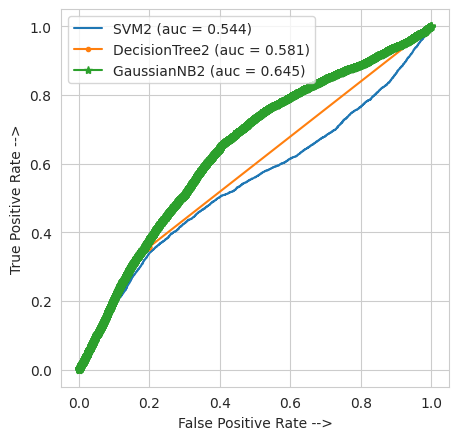

In [35]:

# ROC curve analysis based on X_CleanDF_correlation1 (more features in X regardless of negative correlation)

# predict probabilities
GaussianNB_classifier_pred_prob2 = GaussianNB_classifier2.predict_proba(X_test2)
DecisionTree_classifier_pred_prob2 = DecisionTree_classifier2.predict_proba(X_test2)
SVM_classifier_pred_prob2 = SVM_classifier2.predict_proba(X_test2)
# Positive predictions.
GaussianNB_classifier_pred_prob2 = GaussianNB_classifier_pred_prob2[:,1]
DecisionTree_classifier_pred_prob2 = DecisionTree_classifier_pred_prob2[:,1]
SVM_classifier_pred_prob2 = SVM_classifier_pred_prob2[:,1]

GaussianNB_classifier_fpr2, GaussianNB_classifier_tpr2, threshold = roc_curve(y_test2, GaussianNB_classifier_pred_prob2)
auc_GaussianNB_classifier2 = auc(GaussianNB_classifier_fpr2, GaussianNB_classifier_tpr2)

DecisionTree_classifier_fpr2, DecisionTree_classifier_tpr2, threshold = roc_curve(y_test2, DecisionTree_classifier_pred_prob2)
auc_DecisionTree_classifier2 = auc(DecisionTree_classifier_fpr2, DecisionTree_classifier_tpr2)

SVM_classifier_fpr2, SVM_classifier_tpr2, threshold = roc_curve(y_test2, SVM_classifier_pred_prob2)
auc_SVM_classifier = auc(SVM_classifier_fpr2, SVM_classifier_tpr2)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(SVM_classifier_fpr2, SVM_classifier_tpr2, linestyle='-', label='SVM2 (auc = %0.3f)' % auc_SVM_classifier)
plt.plot(DecisionTree_classifier_fpr2, DecisionTree_classifier_tpr2, marker='.', label='DecisionTree2 (auc = %0.3f)' % auc_DecisionTree_classifier2)
plt.plot(GaussianNB_classifier_fpr2, GaussianNB_classifier_tpr2, marker='*', label='GaussianNB2 (auc = %0.3f)' % auc_GaussianNB_classifier2)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()
